# Statistical evaluation of the expected number of graduating students based on the sucess rate of individual exams

This notebook statistically computes the **number of expected graduates in a program (Bachelor)** or in **consecutive programs** (Bachelor and Master). The model does not take into account dropouts due to personal reasons, which implies that the actual sucess rates of the programs will likely be lower than predicted. 

The model can also be used to assess the number of graduates going into academia and plan the resulting intake of **PhD students for the participating labs**, or to understand the **effect of difficult subjects on the overall success rate** of a program (Bachelor).

**How to use:**
1. Adapt the "USER-MODIFIABLE INPUTS" to the programs you would like to model
2. Run the scripts with "SHIFT+ENTER"

(c) B. Merle, University of Kassel, 2025

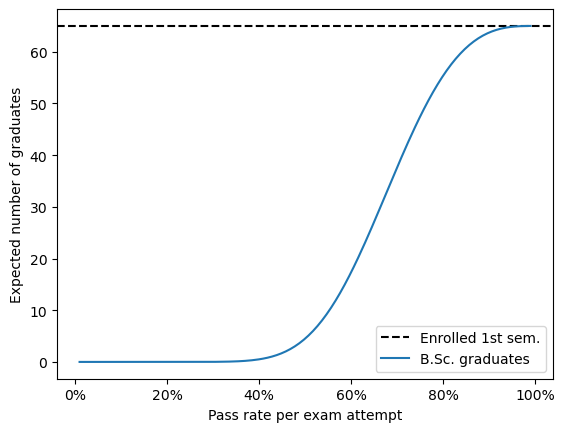

At pass rate 10.00%, expected B.Sc. graduates ≈ 0.00
At pass rate 15.00%, expected B.Sc. graduates ≈ 0.00
At pass rate 20.00%, expected B.Sc. graduates ≈ 0.00
At pass rate 25.00%, expected B.Sc. graduates ≈ 0.00
At pass rate 30.00%, expected B.Sc. graduates ≈ 0.01
At pass rate 35.00%, expected B.Sc. graduates ≈ 0.11
At pass rate 40.00%, expected B.Sc. graduates ≈ 0.50
At pass rate 45.00%, expected B.Sc. graduates ≈ 1.71
At pass rate 50.00%, expected B.Sc. graduates ≈ 4.50
At pass rate 55.00%, expected B.Sc. graduates ≈ 9.62
At pass rate 60.00%, expected B.Sc. graduates ≈ 17.32
At pass rate 65.00%, expected B.Sc. graduates ≈ 27.06
At pass rate 70.00%, expected B.Sc. graduates ≈ 37.60
At pass rate 75.00%, expected B.Sc. graduates ≈ 47.44
At pass rate 80.00%, expected B.Sc. graduates ≈ 55.35
At pass rate 85.00%, expected B.Sc. graduates ≈ 60.75
At pass rate 90.00%, expected B.Sc. graduates ≈ 63.71
At pass rate 95.00%, expected B.Sc. graduates ≈ 64.84


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# ============================================================
# USER-MODIFIABLE INPUTS
# ============================================================

N_students = 65                         # Number of enrolled 1st year students

# Bachelor
bachelor_n_subjects = 20                 # Number of compulsory subjects in the bachelor program
max_attempts = 3                         # Number of allowable attempts per subject


# ============================================================
# CORE CALCULATIONS
# ============================================================

def probability_pass_subject(p, k):
    """Probability of passing a subject within k attempts."""
    return 1 - (1 - p) ** k

# Pass rate per attempt (same for Bachelor and Master), sweep range for plotting
pass_rate_range = np.linspace(0.01, 0.99, 200)

# Compute expected graduates for each pass rate
expected_graduates = []

for p in pass_rate_range:
    prob_pass_one_subject = probability_pass_subject(p, max_attempts)
    prob_pass_all_subjects = prob_pass_one_subject ** bachelor_n_subjects
    expected_graduates.append(N_students * prob_pass_all_subjects)

expected_graduates = np.array(expected_graduates)


# ============================================================
# PLOT
# ============================================================

plt.figure()
plt.axhline(y=N_students, linestyle="--", color="k", label = "Enrolled 1st sem.")
plt.plot(pass_rate_range, expected_graduates, label = "B.Sc. graduates")
plt.xlabel("Pass rate per exam attempt")
plt.ylabel("Expected number of graduates")
#plt.title("Number of Bachelor Graduates")
plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))
plt.legend()
plt.show()

# ============================================================
# NUMERICAL EVALUATION
# ============================================================

# Numeric evaluation
p_check_list = [0.05*i for i in range(2,20)]
for p_check in p_check_list:
    prob_one = probability_pass_subject(p_check, max_attempts)
    prob_all = prob_one ** bachelor_n_subjects
    print(f"At pass rate {p_check:.2%}, expected B.Sc. graduates ≈ {N_students * prob_all:.2f}")

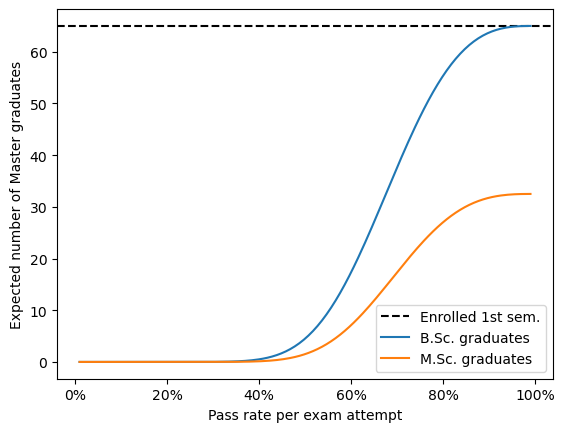

=== Parameters ===
Bachelor: 20 subjects, 3 attempts
Share to master = 50%
Master:   3 subjects, 3 attempts

=== Data points ===
At pass rate 10%, expected M.Sc. graduates ≈ 0.00
At pass rate 20%, expected M.Sc. graduates ≈ 0.00
At pass rate 30%, expected M.Sc. graduates ≈ 0.00
At pass rate 40%, expected M.Sc. graduates ≈ 0.12
At pass rate 50%, expected M.Sc. graduates ≈ 1.51
At pass rate 60%, expected M.Sc. graduates ≈ 7.10
At pass rate 70%, expected M.Sc. graduates ≈ 17.32
At pass rate 80%, expected M.Sc. graduates ≈ 27.02
At pass rate 90%, expected M.Sc. graduates ≈ 31.76


In [2]:
# ============================================================
# USER-MODIFIABLE INPUTS
# ============================================================

# Transition Bachelor -> Master
share_to_master = 0.50                         # Share of bachelor graduates enrolling into the master program

# Master
master_n_subjects = 3                          # Number of compulsory subjects in the master program


# ============================================================
# CORE CALCULATIONS
# ============================================================

def graduation_rate(n_subjects, max_attempts, p_attempt):
    """Probability of graduating (passing all subjects) given p per attempt."""
    p_pass_one = probability_pass_subject(p_attempt, max_attempts)
    return p_pass_one ** n_subjects

expected_master_graduates = []

for p in pass_rate_range:
    # Bachelor graduates (expected)
    bach_grad_rate = graduation_rate(bachelor_n_subjects, max_attempts, p)
    expected_bach_grads = N_students * bach_grad_rate

    # Master entrants (expected)
    expected_master_entrants = share_to_master * expected_bach_grads

    # Master graduates (expected)
    master_grad_rate = graduation_rate(master_n_subjects, max_attempts, p)
    expected_master_grads = expected_master_entrants * master_grad_rate

    expected_master_graduates.append(expected_master_grads)

expected_master_graduates = np.array(expected_master_graduates)


# ============================================================
# PLOT
# ============================================================

plt.figure()
plt.axhline(y=N_students, linestyle="--", color="k", label = "Enrolled 1st sem.")
plt.plot(pass_rate_range, expected_graduates, label = "B.Sc. graduates")
plt.plot(pass_rate_range, expected_master_graduates, label="M.Sc. graduates")
plt.xlabel("Pass rate per exam attempt")
plt.ylabel("Expected number of Master graduates")
plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))
plt.legend()
plt.show()


# ============================================================
# NUMERIC EVALUATION
# ============================================================

print("=== Parameters ===")
print(f"Bachelor: {bachelor_n_subjects} subjects, {max_attempts} attempts")
print(f"Share to master = {share_to_master:.0%}")
print(f"Master:   {master_n_subjects} subjects, {max_attempts} attempts\n")
print("=== Data points ===")
p_check_list = [0.1 * i for i in range(1, 10)]
for p in p_check_list:
    bach_grad_rate = graduation_rate(bachelor_n_subjects, max_attempts, p)
    master_grad_rate = graduation_rate(master_n_subjects, max_attempts, p)
    expected_master_grads = N_students * bach_grad_rate * share_to_master * master_grad_rate
    print(f"At pass rate {p:.0%}, expected M.Sc. graduates ≈ {expected_master_grads:.2f}")


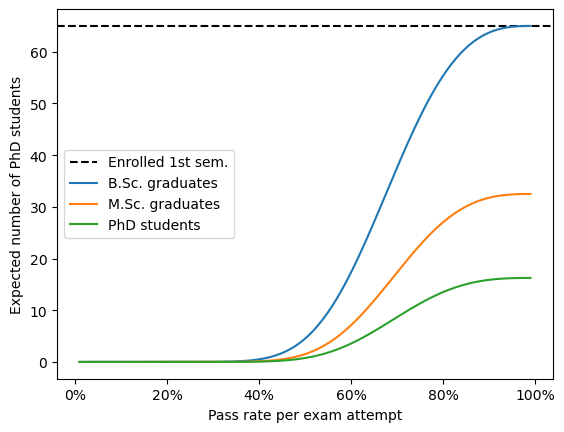

=== Parameters ===
Bachelor: 20 subjects, 3 attempts
Share to master = 50%
Master:   3 subjects, 3 attempts
Share to PhD = 50%

=== Data points ===
At pass rate 10%, expected PhD students ≈ 0.00
At pass rate 20%, expected PhD students ≈ 0.00
At pass rate 30%, expected PhD students ≈ 0.00
At pass rate 40%, expected PhD students ≈ 0.06
At pass rate 50%, expected PhD students ≈ 0.75
At pass rate 60%, expected PhD students ≈ 3.55
At pass rate 70%, expected PhD students ≈ 8.66
At pass rate 80%, expected PhD students ≈ 13.51
At pass rate 90%, expected PhD students ≈ 15.88
At pass rate 100%, expected PhD students ≈ 16.25


In [3]:
# ============================================================
# USER-MODIFIABLE INPUTS
# ============================================================

# Transition Master -> PhD
share_to_phd = 0.50                         # Share of master graduates enrolling into the PhD program


# ============================================================
# CORE CALCULATIONS
# ============================================================

expected_phd_students = expected_master_graduates * share_to_phd


# ============================================================
# PLOT
# ============================================================

plt.figure()
plt.axhline(y=N_students, linestyle="--", color="k", label = "Enrolled 1st sem.")
plt.plot(pass_rate_range, expected_graduates, label = "B.Sc. graduates")
plt.plot(pass_rate_range, expected_master_graduates, label="M.Sc. graduates")
plt.plot(pass_rate_range, expected_phd_students, label="PhD students")
plt.xlabel("Pass rate per exam attempt")
plt.ylabel("Expected number of PhD students")
plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))
plt.legend()
plt.show()


# ============================================================
# NUMERICAL EVALUATION
# ============================================================

print("=== Parameters ===")
print(f"Bachelor: {bachelor_n_subjects} subjects, {max_attempts} attempts")
print(f"Share to master = {share_to_master:.0%}")
print(f"Master:   {master_n_subjects} subjects, {max_attempts} attempts")
print(f"Share to PhD = {share_to_phd:.0%}\n")
print("=== Data points ===")
p_check_list = [0.1 * i for i in range(1, 11)]
for p in p_check_list:
    expected_phd = (
        N_students
        * graduation_rate(bachelor_n_subjects, max_attempts, p)
        * share_to_master
        * graduation_rate(master_n_subjects, max_attempts, p)
        * share_to_phd
    )
    print(f"At pass rate {p:.0%}, expected PhD students ≈ {expected_phd:.2f}")


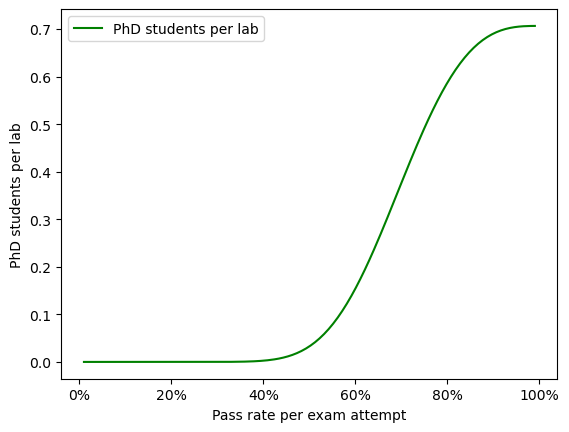

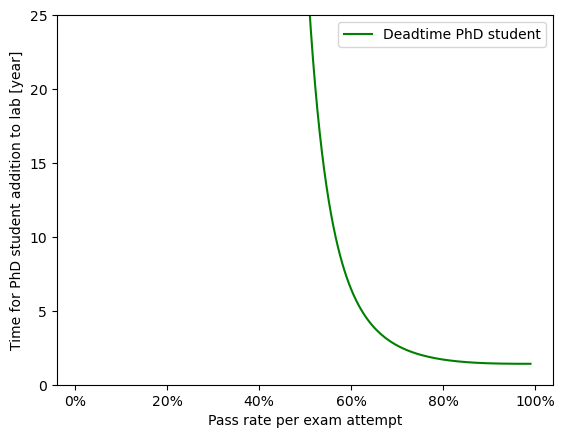

=== Expected PhD students per lab ===
At pass rate 10%: expected PhD students per lab ≈ 0.00 i.e. one student every 15580478112950.5 year
At pass rate 15%: expected PhD students per lab ≈ 0.00 i.e. one student every 4598346497.8 year
At pass rate 20%: expected PhD students per lab ≈ 0.00 i.e. one student every 20759580.1 year
At pass rate 25%: expected PhD students per lab ≈ 0.00 i.e. one student every 421089.3 year
At pass rate 30%: expected PhD students per lab ≈ 0.00 i.e. one student every 22226.5 year
At pass rate 35%: expected PhD students per lab ≈ 0.00 i.e. one student every 2280.0 year
At pass rate 40%: expected PhD students per lab ≈ 0.00 i.e. one student every 381.6 year
At pass rate 45%: expected PhD students per lab ≈ 0.01 i.e. one student every 93.0 year
At pass rate 50%: expected PhD students per lab ≈ 0.03 i.e. one student every 30.5 year
At pass rate 55%: expected PhD students per lab ≈ 0.08 i.e. one student every 12.7 year
At pass rate 60%: expected PhD students per la

In [4]:
# ============================================================
# USER-MODIFIABLE INPUTS
# ============================================================

n_labs = 23                       # Number of labs in the department



# ============================================================
# CORE CALCULATIONS
# ============================================================

expected_phd_per_lab = expected_phd_students / n_labs      # Expected PhD students per lab
waiting_time_PhD_students = 1 / expected_phd_per_lab       # Latency between PhD enrollments in a lab


# ============================================================
# PLOT
# ============================================================

plt.figure()
plt.plot(pass_rate_range, expected_phd_per_lab, label="PhD students per lab",color="g")
plt.xlabel("Pass rate per exam attempt")
plt.ylabel("PhD students per lab")
plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))
plt.legend()
plt.show()

plt.figure()
plt.plot(pass_rate_range, waiting_time_PhD_students, label="Deadtime PhD student",color="g")
plt.xlabel("Pass rate per exam attempt")
plt.ylabel("Time for PhD student addition to lab [year]")
plt.ylim(0., 25.)
plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))
plt.legend()
plt.show()

# ============================================================
# NUMERICAL EVALUATION
# ============================================================

print("=== Expected PhD students per lab ===")
p_check_list = [0.05 * i for i in range(2, 20)]

for p in p_check_list:
    expected_phd = (
        N_students
        * graduation_rate(bachelor_n_subjects, max_attempts, p)
        * share_to_master
        * graduation_rate(master_n_subjects, max_attempts, p)
        * share_to_phd
    )
    print(
        f"At pass rate {p:.0%}: "
        f"expected PhD students per lab ≈ {expected_phd / n_labs:.2f}"
        f" i.e. one student every {n_labs/expected_phd:.1f} year"
    )


## Effect of difficult subjects on the overall success rate of a single program (Bachelor)

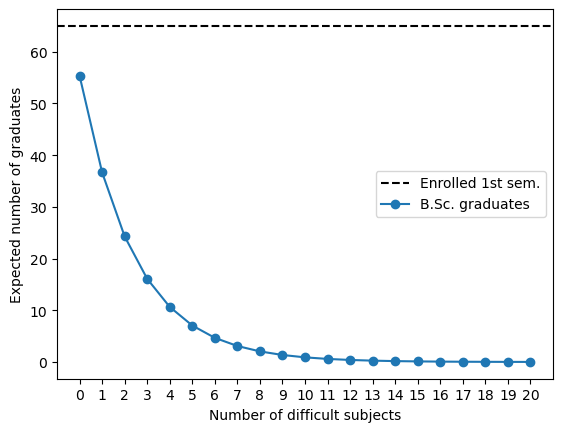

=== Data points ===
For 0 difficult subjects -> B.Sc. graduates: 55.4
For 1 difficult subjects -> B.Sc. graduates: 36.7
For 2 difficult subjects -> B.Sc. graduates: 24.3
For 3 difficult subjects -> B.Sc. graduates: 16.1
For 4 difficult subjects -> B.Sc. graduates: 10.7
For 5 difficult subjects -> B.Sc. graduates: 7.1
For 6 difficult subjects -> B.Sc. graduates: 4.7
For 7 difficult subjects -> B.Sc. graduates: 3.1
For 8 difficult subjects -> B.Sc. graduates: 2.0
For 9 difficult subjects -> B.Sc. graduates: 1.4
For 10 difficult subjects -> B.Sc. graduates: 0.9
For 11 difficult subjects -> B.Sc. graduates: 0.6
For 12 difficult subjects -> B.Sc. graduates: 0.4
For 13 difficult subjects -> B.Sc. graduates: 0.3
For 14 difficult subjects -> B.Sc. graduates: 0.2
For 15 difficult subjects -> B.Sc. graduates: 0.1
For 16 difficult subjects -> B.Sc. graduates: 0.1
For 17 difficult subjects -> B.Sc. graduates: 0.1
For 18 difficult subjects -> B.Sc. graduates: 0.0
For 19 difficult subjects -> B.Sc. 

In [5]:
# ============================================================
# USER-MODIFIABLE INPUTS
# ============================================================

# Per-attempt success rates
p_difficult_attempt = 0.30             # Pass rate of difficult subject, e.g. Thermodynamics 2
p_normal_attempt = 0.80                # Pass rate of normal subject, e.g. Materials 1


# ============================================================
# CORE CALCULATIONS
# ============================================================

# Convert per-attempt rates into per-subject pass probabilities (within allowed attempts)
p_pass_difficult = probability_pass_subject(p_difficult_attempt, max_attempts)
p_pass_normal = probability_pass_subject(p_normal_attempt, max_attempts)

# Expected graduates as a function of the number of difficult subjects m
m_difficult = np.arange(0, bachelor_n_subjects + 1)  # 0..n_subjects
prob_graduate = (p_pass_difficult ** m_difficult) * (p_pass_normal ** (bachelor_n_subjects - m_difficult))
expected_graduates_hard_normal = N_students * prob_graduate


# ============================================================
# PLOT
# ============================================================

plt.figure()
plt.axhline(y=N_students, linestyle="--", color="k", label = "Enrolled 1st sem.")
plt.plot(m_difficult, expected_graduates_hard_normal, marker="o", label = "B.Sc. graduates")
plt.xlabel("Number of difficult subjects")
plt.ylabel("Expected number of graduates")
# plt.title("Number of Graduates as function of difficult subjects")
plt.xticks(m_difficult)
plt.legend(loc='right')
plt.show()

# ============================================================
# NUMERIC EVALUATION
# ============================================================

print("=== Data points ===")
for p in range(len(m_difficult)):
    print(f"For {m_difficult[p]:.0f} difficult subjects -> B.Sc. graduates: {expected_graduates_hard_normal[p]:.1f}")